In [1]:
#Importing the libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from scipy.stats import chi2_contingency

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
#Loading the data
df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [3]:
#Descriptive Analysis

print(df.shape)

df.describe()

(300698, 53)


,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.006980e+05,298083.000000,2.971580e+05,297158.000000,0.0,0.0,0.0,0.0,0.0,297158.000000,297158.000000
mean,3.130054e+07,10848.888645,1.004854e+06,203754.534416,NaN,NaN,NaN,NaN,NaN,40.725885,-73.925630
std,5.738547e+05,583.182081,2.175338e+04,29880.183529,NaN,NaN,NaN,NaN,NaN,0.082012,0.078454
min,3.027948e+07,83.000000,9.133570e+05,121219.000000,NaN,NaN,NaN,NaN,NaN,40.499135,-74.254937
25%,3.080118e+07,10310.000000,9.919752e+05,183343.000000,NaN,NaN,NaN,NaN,NaN,40.669796,-73.972142
50%,3.130436e+07,11208.000000,1.003158e+06,201110.500000,NaN,NaN,NaN,NaN,NaN,40.718661,-73.931781
75%,3.178446e+07,11238.000000,1.018372e+06,224125.250000,NaN,NaN,NaN,NaN,NaN,40.781840,-73.876805
max,3.231065e+07,11697.000000,1.067173e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700760


## We see lots of missing value. All the values given in the above does not provides us very clear insights about our data so we can move ahead with Exploratory Data Analysis.

In [4]:
#Convert data into datetime format
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Closed Date'] = pd.to_datetime(df['Closed Date'])
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [5]:
#Creating a new columns that consist the total time taken to resolve the complaint
df['Request_Closing_Time'] = (df['Closed Date'] - df['Created Date'])

Request_Closing_Time = []
for x in (df['Closed Date'] - df['Created Date']):
    close = x.total_seconds()/60
    Request_Closing_Time.append(close)

df['Request_Closing_Time'] = Request_Closing_Time

In [6]:
# Exploratory Data Analysis

df['Agency'].unique()

array(['NYPD'], dtype=object)

In [7]:
#All our data belongs to a single department of NYPD

<function matplotlib.pyplot.show(close=None, block=None)>

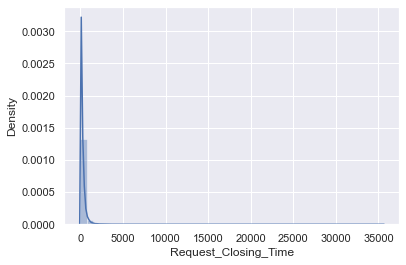

In [8]:
#Univariate Distribution for Request closing time
sns.distplot(df['Request_Closing_Time'])
plt.show

In [9]:
print('Total number of concerns:',len(df),'/n')
print('Percent of requests took less than 100 hours to get solved:', round((len(df)-(df['Request_Closing_Time']>100).sum())/len(df)*100,2),'%')
print('Percent of requests took less than 1000 hours to get solved:', round((len(df)-(df['Request_Closing_Time']>1000).sum())/len(df)*100,2),'%')

Total number of concerns: 300698 /n
Percent of requests took less than 100 hours to get solved: 33.32 %
Percent of requests took less than 1000 hours to get solved: 97.19 %


## From the above we can see the data is heavily skewed. There are a lot of outliers. Almost 97% of the requests are solved within 1000 hours i.e 17 days

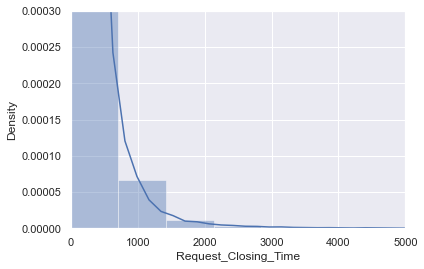

In [10]:
#Univariate Distribution for Request closing time
sns.distplot(df['Request_Closing_Time'])
plt.xlim((0,5000))
plt.ylim((0,0.0003))
plt.show()

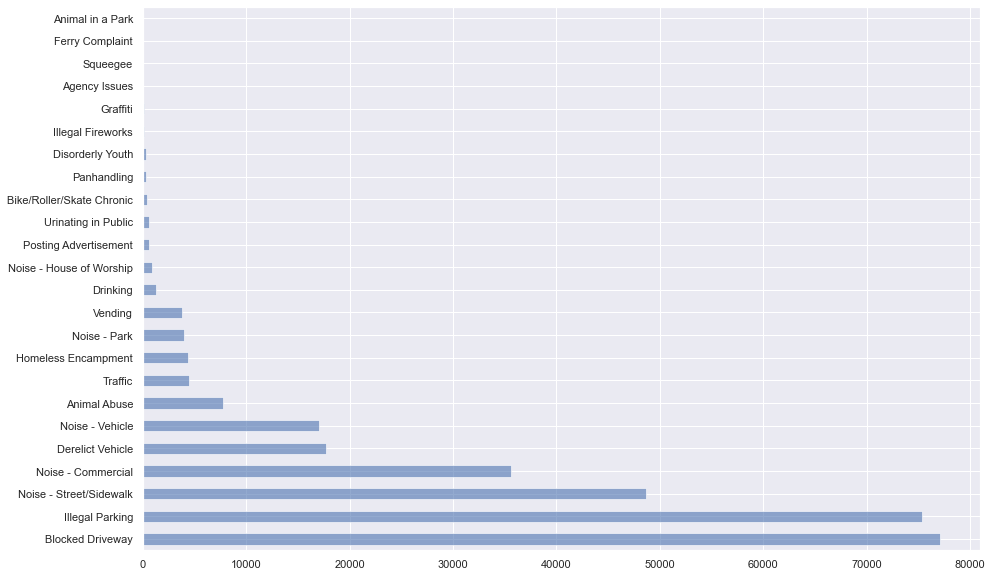

In [11]:
#Count Plot to understand the type of complaints raised
df['Complaint Type'].value_counts().plot(kind='barh',alpha=0.6,figsize=(15,10))
plt.show()

# Almost around 85% of the the requests belongs to transport (Blocked driveway, illegal parking, vehicle noise, road traffic etc ).

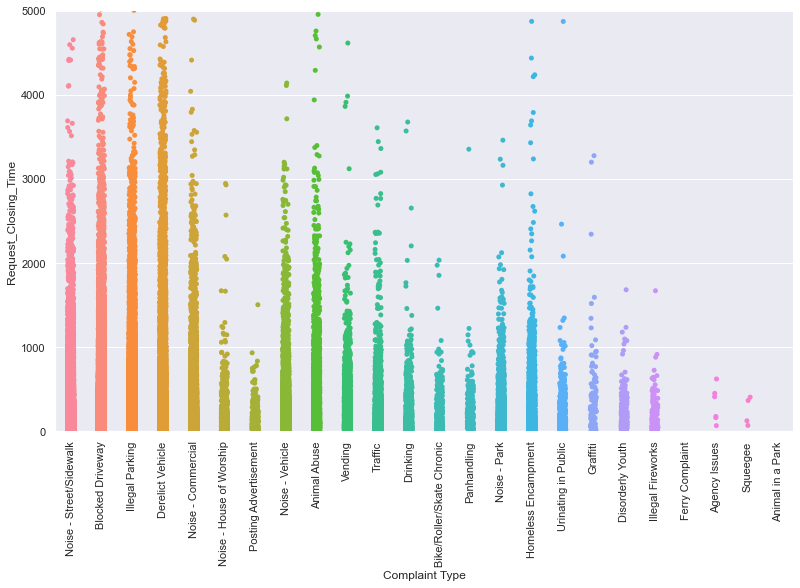

In [12]:
#Categorical scatter plot to understand which type of complaints are taking more time to get resolved
p=sns.catplot(x='Complaint Type', y='Request_Closing_Time', data=df)
p.fig.set_figwidth(15)
p.fig.set_figheight(7)
plt.xticks(rotation=90)
plt.ylim((0,5000))
plt.show()

## As we have got above that almost around 85% of the the requests belongs to transport (Blocked driveway,Illegal Parking, Vehicle Noise, Road Traffic etc ). From this plot we can understand that most of these issues have taken more time to get resolved. Government should take measure in incresing awareness and find some measures to reduce traffic problems.

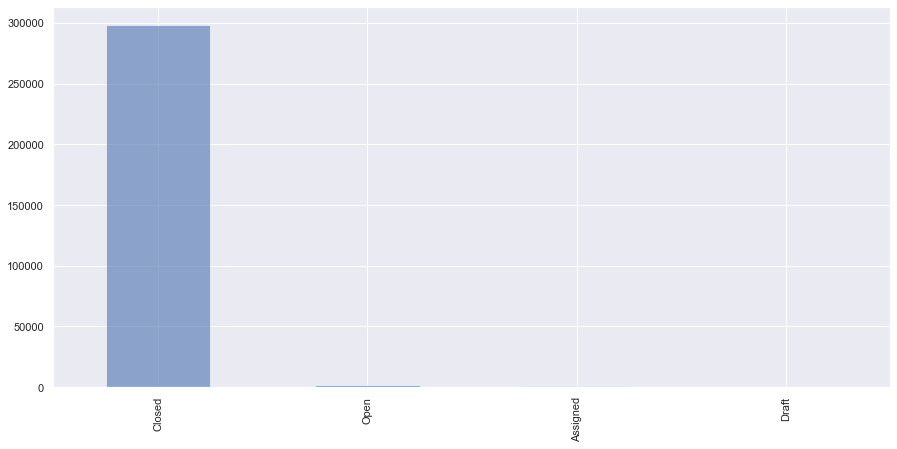

In [13]:
#Count plot to know the status of the requests
df['Status'].value_counts().plot(kind='bar',alpha=0.6,figsize=(15,7))
plt.show()

## As of now 98% of the cases are closed.

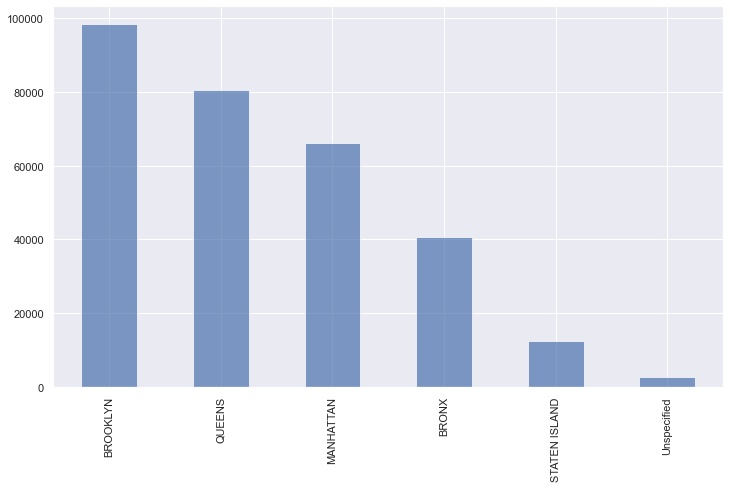

In [14]:
#Count plot for column borough
plt.figure(figsize=(12,7))
df['Borough'].value_counts().plot(kind='bar',alpha=0.7)
plt.show()

In [15]:
#Percentage of cases in each Borough
for x in df['Borough'].unique():
    print('Percentage of requests from', x, 'division:', round((df['Borough']==x).sum()/len(df)*100,2))

Percentage of requests from MANHATTAN division: 21.99
Percentage of requests from QUEENS division: 26.82
Percentage of requests from BRONX division: 13.54
Percentage of requests from BROOKLYN division: 32.69
Percentage of requests from Unspecified division: 0.86
Percentage of requests from STATEN ISLAND division: 4.1


In [16]:
#Unique location types
df['Location Type'].unique()

array(['Street/Sidewalk', 'Club/Bar/Restaurant', 'Store/Commercial',
       'House of Worship', 'Residential Building/House',
       'Residential Building', 'Park/Playground', 'Vacant Lot',
       'House and Store', 'Highway', 'Commercial', 'Roadway Tunnel',
       'Subway Station', 'Parking Lot', 'Bridge', 'Terminal', nan,
       'Ferry', 'Park'], dtype=object)

In [17]:
#Request closing time for all location type in ascending order
pd.DataFrame(df.groupby('Location Type')['Request_Closing_Time'].mean()).sort_values('Request_Closing_Time')

,Request_Closing_Time
Location Type,
Subway Station,142.250980
Club/Bar/Restaurant,186.074330
House of Worship,191.833279
Store/Commercial,198.089073
Park/Playground,207.137129
Highway,223.424221
Bridge,229.158333
Roadway Tunnel,266.525714
Street/Sidewalk,268.515306


## We see that maximum(mean) time to resolve the complaint is taken in Park,Vacant Lot and Commercial areas whereas the cases in the Subway Station and Restaurent are resolved in very less time

In [18]:
#Request Closing Time for all City sorted in ascending Order
pd.DataFrame(df.groupby('City')['Request_Closing_Time'].mean()).sort_values('Request_Closing_Time')

,Request_Closing_Time
City,
ARVERNE,135.895606
ROCKAWAY PARK,139.133736
LITTLE NECK,154.660316
OAKLAND GARDENS,157.853146
BAYSIDE,160.759992
FAR ROCKAWAY,167.399774
NEW YORK,178.357371
FLUSHING,181.081826
FOREST HILLS,193.449032


## Handling Missing Values

In [19]:
#Percentage of missing values
pd.DataFrame((df.isnull().sum()/df.shape[0]*100)).sort_values(0,ascending=False)[:20]

,0
School or Citywide Complaint,100.000000
Garage Lot Name,100.000000
Vehicle Type,100.000000
Taxi Pick Up Location,100.000000
Taxi Company Borough,100.000000
Ferry Direction,99.999667
Ferry Terminal Name,99.999335
Road Ramp,99.929165
Bridge Highway Segment,99.929165
Bridge Highway Direction,99.919188


## We see that all the data related to school columns are empty which must be because none of the request or complaint are from the school sector. Thus we can go on and remove that column.

In [20]:
#Remove the column with very high percentage of missing value
new_df=df.loc[:,(df.isnull().sum()/df.shape[0]*100)<=50]

print("Old DataFrame Shape :",df.shape)
print("New DataFrame Shape : ",new_df.shape)

Old DataFrame Shape : (300698, 54)
New DataFrame Shape :  (300698, 40)


In [21]:
rem=[]
for x in new_df.columns.tolist():
    if new_df[x].nunique()<=3:
        print(x+ " "*10+" : ",new_df[x].unique())
        rem.append(x)

Agency           :  ['NYPD']
Agency Name           :  ['New York City Police Department' 'NYPD' 'Internal Affairs Bureau']
Facility Type           :  ['Precinct' nan]
Park Facility Name           :  ['Unspecified' 'Alley Pond Park - Nature Center']
School Name           :  ['Unspecified' 'Alley Pond Park - Nature Center']
School Number           :  ['Unspecified' 'Q001']
School Region           :  ['Unspecified' nan]
School Code           :  ['Unspecified' nan]
School Phone Number           :  ['Unspecified' '7182176034']
School Address           :  ['Unspecified' 'Grand Central Parkway, near the soccer field']
School City           :  ['Unspecified' 'QUEENS']
School State           :  ['Unspecified' 'NY']
School Zip           :  ['Unspecified' nan]
School Not Found           :  ['N']


## We see that all the data above have not much details, are Unspecified. So we can remove those columns to ease our analysis

In [22]:
new_df.drop(rem,axis=1,inplace=True)

In [23]:
new_df.shape

(300698, 26)

In [24]:
new_df.head()

,Unique Key,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,...,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",55.250000
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,...,01-01-16 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",86.266667
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,...,01-01-16 4:51,07 BRONX,BRONX,1015081.0,256380.0,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",291.516667
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,...,01-01-16 7:43,10 BRONX,BRONX,1031740.0,243899.0,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",465.233333
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,...,01-01-16 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",207.033333


## Hypothesis Testing

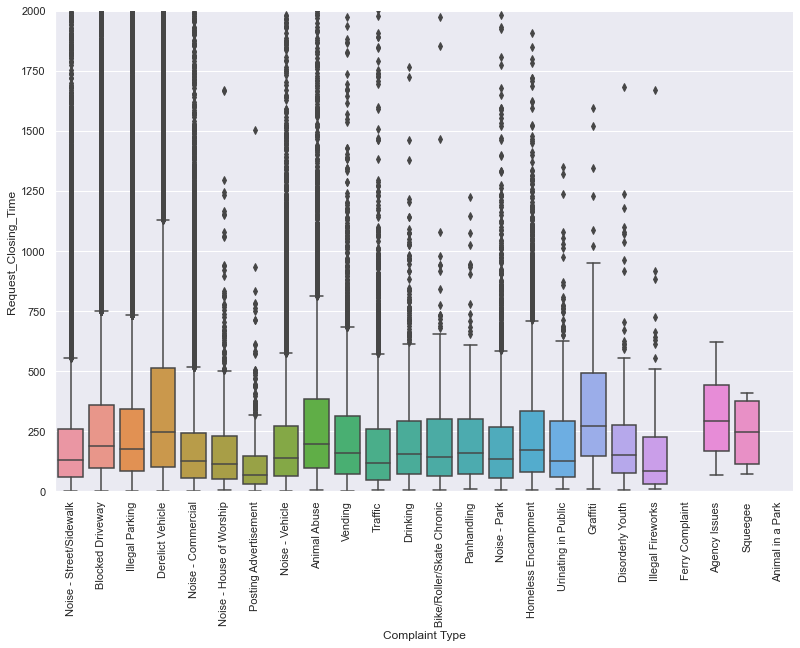

In [25]:
p=sns.catplot(x='Complaint Type', y='Request_Closing_Time', kind='box', data=df)
p.fig.set_figwidth(15)
p.fig.set_figheight(8)
plt.xticks(rotation=90)
plt.ylim((0,2000))
plt.show()

## 𝐻0: there is no significant different in mean of Request_Closing_Time for different Complaint
## 𝐻1:there is signficant different in mean of Request_Closing_Time for different Complaint
 

In [26]:
anova_df=pd.DataFrame()
anova_df["Request_Closing_Time"]=new_df["Request_Closing_Time"]
anova_df["Complaint"]=new_df["Complaint Type"]

anova_df.dropna(inplace=True)
anova_df.head()

,Request_Closing_Time,Complaint
0,55.250000,Noise - Street/Sidewalk
1,86.266667,Blocked Driveway
2,291.516667,Blocked Driveway
3,465.233333,Illegal Parking
4,207.033333,Illegal Parking


In [27]:
lm=ols("Request_Closing_Time~Complaint",data=anova_df).fit()
table=sm.stats.anova_lm(lm)
table

,df,sum_sq,mean_sq,F,PR(>F)
Complaint,22.0,1.455049e+09,6.613860e+07,514.177089,0.0
Residual,298511.0,3.839747e+10,1.286300e+05,NaN,NaN


## Since p value for the Complaint is less that 0.01 thus we accept alternate hypothesis i.e there is significant difference in the mean response time w.r.t different type of complaint.

## 𝐻0:Complaint Type and Location Type are independent
## 𝐻1:Complaint Type and Location Type are related

In [28]:
chi_sq=pd.DataFrame()
chi_sq["Location Type"]=new_df["Location Type"]
chi_sq["Complaint Type"]=new_df["Complaint Type"]

chi_sq.dropna(inplace=True)

data_crosstab = pd.crosstab( chi_sq["Location Type"],chi_sq["Complaint Type"])

stat, p, dof, expected = chi2_contingency(data_crosstab) 

alpha = 0.05
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

Dependent (reject H0)


## Since p value for the chi square test is less than 0.05(LOS) we can conclude that Complaint Type is dependent on Location Type i.e specific type of complaint is raised from specific places.